In [1]:
import torch
import torch_geometric
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor, Compose, Lambda
from torch_geometric.transforms import ToSLIC
import matplotlib.pyplot as plt
from torch_geometric.datasets import MNISTSuperpixels
%matplotlib inline

### TORCHVISION MNIST + PERMUTATION + SLIC

In [2]:
permutation = torch.randperm(28*28)

In [6]:
dataset = MNIST(root='/home/cossu', train=True, transform=Compose([
        ToTensor(),
        Lambda(lambda el: el.view(-1)[permutation].view(1,28,28)),
        ToSLIC()
        ]))

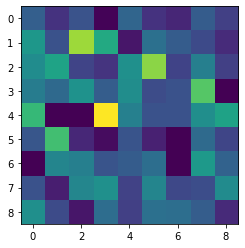

In [11]:
plt.imshow(dataset[0][0].x.view(9,9).numpy())

In [21]:
# how many nodes per graph?

dims = []
for i,el in enumerate(dataset):
    if i > 100:
        break
    dims.append(el[0].x.shape[0])
print(dims)

[81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81]


## TORCH GEOMETRIC MNIST SUPERPIXELS (same number of nodes)

In [16]:
import os
import torch
from torch_geometric.data import (InMemoryDataset, Data, download_url,
                                  extract_tar)


class MyMNISTSuperpixels(MNISTSuperpixels):
    r"""MNIST superpixels dataset from the `"Geometric Deep Learning on
    Graphs and Manifolds Using Mixture Model CNNs"
    <https://arxiv.org/abs/1611.08402>`_ paper, containing 70,000 graphs with
    75 nodes each.
    Every graph is labeled by one of 10 classes.

    Args:
        root (string): Root directory where the dataset should be saved.
        train (bool, optional): If :obj:`True`, loads the training dataset,
            otherwise the test dataset. (default: :obj:`True`)
        transform (callable, optional): A function/transform that takes in an
            :obj:`torch_geometric.data.Data` object and returns a transformed
            version. The data object will be transformed before every access.
            (default: :obj:`None`)
        pre_transform (callable, optional): A function/transform that takes in
            an :obj:`torch_geometric.data.Data` object and returns a
            transformed version. The data object will be transformed before
            being saved to disk. (default: :obj:`None`)
        pre_filter (callable, optional): A function that takes in an
            :obj:`torch_geometric.data.Data` object and returns a boolean
            value, indicating whether the data object should be included in the
            final dataset. (default: :obj:`None`)
    """

    url = ('https://ls7-www.cs.tu-dortmund.de/fileadmin/ls7-www/misc/cvpr/mnist_superpixels.tar.gz')
    
    def download(self):
        super().download()
    def process(self):
        super().process()

In [18]:
mymnist = MyMNISTSuperpixels('/home/cossu/superpixels')

In [20]:
# how many nodes per graph?

dims = []
for i,el in enumerate(mymnist):
    if i > 100:
        break
    dims.append(el.x.shape[0])
print(dims)

[75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75, 75]


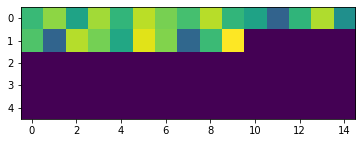

In [23]:
# superpixels plot (not spatially ordered)

plt.imshow(mymnist[0].x.view(5,15).numpy())

Class  9


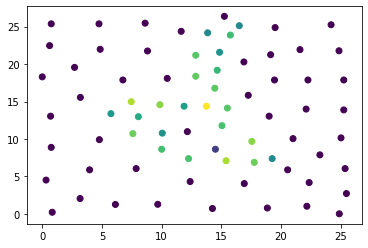

In [25]:
# superpixels plot (spatially ordered)
i = 4
plt.scatter(mymnist[i].pos[:,0].numpy(), mymnist[i].pos[:,1].numpy(), c=mymnist[i].x.squeeze().numpy())
print("Class ", mymnist[i].y.item())